In [30]:
import sys,os
sys.path.append(os.path.realpath('..'))
from db_conn.database import engine
import pandas as pd


In [31]:
df_by_gender = pd.read_sql(
    "select distinct rndrng_prvdr_gndr, count(*) from \"service\" where rndrng_prvdr_ent_cd = 'I' group by rndrng_prvdr_gndr",
    con=engine
)

<AxesSubplot:title={'center':"Gender in Medicare's Providers"}, ylabel='count'>

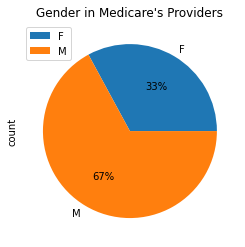

In [32]:
df_by_gender.groupby(['rndrng_prvdr_gndr']).sum().plot(kind='pie', y='count', autopct='%1.0f%%', title='Gender in Medicare\'s Providers')

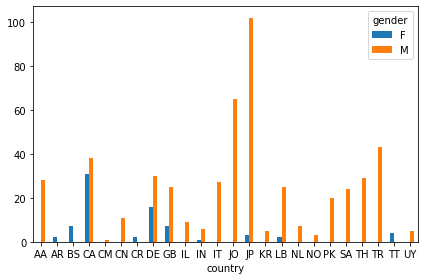

In [40]:
from matplotlib import pyplot as plt
df_by_country_isnot_us = pd.read_sql(
    "select distinct rndrng_prvdr_cntry as country, rndrng_prvdr_gndr as gender, count(*) from \"service\" where rndrng_prvdr_ent_cd = 'I' and rndrng_prvdr_cntry <> 'US' group by rndrng_prvdr_cntry, rndrng_prvdr_gndr",
    con=engine
)
df_by_country_isnot_us.pivot(index='country', columns='gender', values='count').plot(kind='bar', rot=0)
plt.tight_layout()
plt.show()

In [67]:
df_by_us_state_m = pd.read_sql(
    "select distinct rndrng_prvdr_state_abrvtn as state,  count(*) from \"service\" where rndrng_prvdr_ent_cd = 'I' and rndrng_prvdr_cntry = 'US' and rndrng_prvdr_gndr = 'M' group by rndrng_prvdr_state_abrvtn",
    con=engine
)

df_by_us_state_f = pd.read_sql(
    "select distinct rndrng_prvdr_state_abrvtn as state,  count(*) from \"service\" where rndrng_prvdr_ent_cd = 'I' and rndrng_prvdr_cntry = 'US' and rndrng_prvdr_gndr = 'F' group by rndrng_prvdr_state_abrvtn",
    con=engine
)


In [68]:
counties_lati_long = pd.read_csv('../usa_states_latitude_and_longitude_values.csv', keep_default_na=False, na_values=[""])


In [69]:
merged_df_us_county_m = pd.merge(left=df_by_us_state_m, right=counties_lati_long, left_on='state', right_on='usa_state_code')
merged_df_us_county_f = pd.merge(left=df_by_us_state_f, right=counties_lati_long, left_on='state', right_on='usa_state_code')

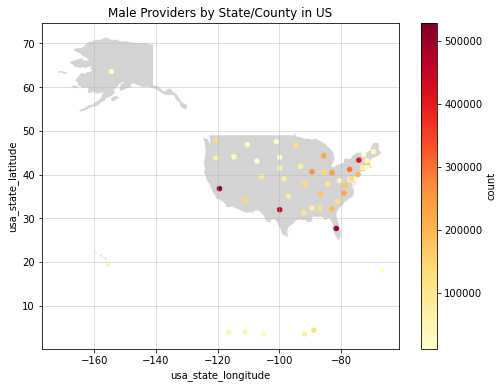

In [70]:
import geopandas as gpd
import matplotlib.pyplot as plt

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax=ax)

# plot points
merged_df_us_county_m.plot(x="usa_state_longitude", y="usa_state_latitude", kind="scatter", c="count", colormap="YlOrRd", 
        title="Male Providers by State/County in US", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()


In [72]:
# plot points
merged_df_us_county_f.plot(x="usa_state_longitude", y="usa_state_latitude", kind="scatter", c="count", colormap="YlOrRd", 
        title="Female Providers by State/County in US", ax=ax)

# add grid
ax.grid(b=True, alpha=0.5)

plt.show()